# Binary Logistic Regression (BLR)


Logistic regression is an ML classification algorithm that is used to predict the probability of a categorical or binary output. It predicts a binary outcome that contains data coded as 1 (e.g. yes, success) or 0 (e.g. no, failure). 

For example, if a student will pass an exam (1) or not (0), or whether a customer will purchase an item (1) or not (0). 

## Six Assumptions of logistic regression

To use logistic regression, the following assumptions need to be met or be true (which we’ll work through in the upcoming worked example):

- Assumption 1: The dependent variable is binary.


- Assumption 2: The factor level 1 of the dependent variable should represent the desired outcome.


- Assumption 3: Only the meaningful variables, based on your data analysis, should be included.


- Assumption 4: The independent variables (LaTeX: X) should be independent of each other. That is, the model should have little or no multicollinearity.


- Assumption 5: The independent variables (LaTeX: X) are linearly related to the log odds or the logarithm of the odds. 


- Assumption 6: Logistic regression requires large sample sizes relative to the data collected and the question to be solved. 

Logistic regression is used in statistical software to determine, predict, and understand the probability of the occurrence of an event. It does this by fitting data to a logit function between a dependent and one or more independent variables by employing probabilities.

In this worked example, we will practise using binary logistic regression (BLR). You’ll apply a BLR model that’s based on binary data. (Note: The worked example will span several pages.)

#### Demonstration: Using BLR with Python to determine product-market fit 

You're employed by Telcom National (TN) as a lead data analyst and are asked to determine whether a customer is likely to churn; in other words, you are asked to predict the likelihood of a new customer ‘churning’ or leaving a specific service provider. To start, you will need to run a BLR on the data by checking each of the six assumptions of logistic regression presented earlier.

Before you can start checking assumptions, you’ll need to familiarise yourself with the data set by importing the raw data into Python and sense-checking it with the Pandas library.

Reorder these steps to help decide what you should do next. Click on the tab you think should be first on the list. See if you get the 'green' light (checkmark icon). Repeat this step four times.

# 1. Import and read the data set

In [1]:
# [3] Import all the necessary packages (Pandas and NumPy):
import pandas as pd
import numpy as np

# [4] Read the provided CSV file/data set.
df = pd.read_csv("Customer_data.csv") 

# [5] Print the table.
df.head()  

Age   Occupation   Status                Edu House Loan      Comm Month  \
0   44  blue-collar  married           basic.4y   yes   no  cellular   aug   
1   53   technician  married            unknown    no   no  cellular   nov   
2   28   management   single  university.degree   yes   no  cellular   jun   
3   39     services  married        high.school    no   no  cellular   apr   
4   55      retired  married           basic.4y   yes   no  cellular   aug   

   DOW  Duration  Campaign  PosDays     Last_out  Var_rate  Price_idx  \
0  thu       210         1      999  nonexistent       1.4     93.444   
1  fri       138         1      999  nonexistent      -0.1     93.200   
2  thu       339         3        6      success      -1.7     94.055   
3  fri       185         2      999  nonexistent      -1.8     93.075   
4  fri       137         1        3      success      -2.9     92.201   

   Conf_idx  Month_rate  Quarterly_emp  Target  
0     -36.1       4.963         5228.1       0  
1     -42.0       4.021         5195.8       0  
2     -39.8       0.729         4991.6       1  
3     -47.1       1.405         5099.1       0  
4     -31.4       0.869         5076.2       1

# 2. Determine the data types of each column


Next, we’ll need to determine the data types of the columns, which will indicate whether we need to change the data before beginning the analysis (e.g. replace strings with single words or round numeric values to a specific number of decimals). 

To do this, recall we use the df.types Pandas property:

In [2]:
# Find the data types of columns.
df.dtypes  

Age                int64
Occupation        object
Status            object
Edu               object
House             object
Loan              object
Comm              object
Month             object
DOW               object
Duration           int64
Campaign           int64
PosDays            int64
Last_out          object
Var_rate         float64
Price_idx        float64
Conf_idx         float64
Month_rate       float64
Quarterly_emp    float64
Target             int64
dtype: object

# 3. Determine the shape of the data set


The shape of the data set can indicate the number of rows and columns in a table, which also gives data analysts an indication of the size of the data set. (Remember from the previous page that one of the assumptions to be met for logistic regression is a large data set.) 

In [3]:
# Determine the shape of the data set.
df.shape  

(41188, 19)

# 4. Check for missing values

There is a shortcut to determine the column names, data type, and shape of the data set, and whether there are any missing values. For this, we can use the info() function! (Remember that missing values are normally represented in the form of NaN, null, or None in a data set.)

In [4]:
# Determine missing values, column names, shape of data set, and data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

<img width="816" alt="Screenshot 2022-05-19 at 12 31 35" src="https://user-images.githubusercontent.com/98043245/169283776-4c7e2963-2839-4663-a091-810cc6af5840.png">

# Checking for meaningful variables (Assumption 3)

With Assumptions 1, 2, and 6 checked, we now need to address Assumption 3, which indicates that only meaningful variables should be included.

For this assumption to be true, we need to investigate each of the columns and determine whether they are meaningful and should be included. In short, if the variable contributes to the binary outcome, it needs to be included.

<img width="816" alt="Screenshot 2022-05-19 at 12 43 43" src="https://user-images.githubusercontent.com/98043245/169285592-5069f76a-a56d-4c50-8eca-46a38c56f2a0.png">

# 1. Determine object containing counts of unique values 

The education column (Edu) in the DataFrame consists of strings. Before we can create dummy variables, we need to convert the strings into single words that will be easier to analyse than strings of variable lengths. For this worked example, we will only update the details of the education column.

We know we can use the value_counts() function to determine the count per variable; Python will then return the name of each unique variable and the number of them in the specified column. This helps data analysts limit the number of spelling errors when specifying how to update the details (i.e. the variables) of the column. 

To determine the values within the Edu column:

Specify the DataFrame and column as df['Edu'].
Add the value_counts() function.

In [5]:
# [1] Specify the DataFrame column & [2] Add/determine the values.
df['Edu'].value_counts() 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

# 2. Update the categories in the Edu column

In [6]:
# [1] Specify the DataFrame and column name,
# [2] Specify the DataFrame and the column name that contains 
# the string to be changed 
# [3] Specify the word to be changed that the string contains 
# and the new name:

df.loc[df['Edu'].str.contains('basic'),'Edu' ] = 'pre-school'
df.loc[df['Edu'].str.contains('university'),'Edu' ] = 'uni'
df.loc[df['Edu'].str.contains('high'),'Edu' ] = 'high-school'
df.loc[df['Edu'].str.contains('professional') ,'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'),'Edu' ] = 'other'
df.loc[df['Edu'].str.contains('unknown'),'Edu' ] = 'other'

# [5] Display all the unique values/check changes.
df['Edu'].unique()  

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

Well done! An array was created with the changed variables. The output shows all the unique names in the Edu column. As we can see, illiterate and unknown have now been replaced by other.

There might be a warning message indicating A value is trying to be set on a copy of a slice from a DataFrame. Python is just indicating that we only worked in a Series (one column). We can ignore this warning message.

# 3. Create dummy variables 

When we derive dummy variables from categorical variables, we don’t need to keep the original variables in the data set. Let’s look at how to reorganise and clean up the variables. In Pandas, we can use the pd.get_dummies() function to create dummy variables. We can also use a loop to check and selectively remove columns from the DataFrame.

In [7]:
# [1] Name new DataFrame and convert categorical variables to dummy variables:
cat_vars=['Occupation', 'Status', 'Edu', 'House', 'Loan',
          'Comm', 'Month', 'DOW', 'Last_out']

# [2] Use the for loop keyword to specify what actions to apply to 
# all the ‘var’ items:
# [2a] Specify what needs to apply to all the variables.
for var in cat_vars:
    cat_list='var'+'_'+var  
    # [2b] Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)
    # [2c] Indicate the joining of the DataFrames.
    df = df.join(cat_list)
    
    df_fin = df.drop(cat_vars, axis=1)
    
    # Specify the column names
    cat_vars=['Occupation', 'Status', 'Edu', 'House', 'Loan',
          'Comm', 'Month', 'DOW', 'Last_out']
    
# [4] Set a temporary DataFrame and add values.
df_vars=df.columns.values.tolist() 
# [5] Indicate what columns are kept.
to_keep=[i for i in df_vars if i not in cat_vars] 

# [6] Define new DataFrame. 
df_fin=df[to_keep]  
# [7] Print the column.
df_fin.columns.values

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

#### Dummy variables: easier option

Its just for demonstration

In [8]:
features = ['Occupation', 'Status', 'Edu', 'House', 'Loan', 'Comm', 'Month',
       'DOW', 'Last_out']

new_df = pd.get_dummies(df, columns = features)

new_df

Age  Duration  Campaign  PosDays  Var_rate  Price_idx  Conf_idx  \
0       44       210         1      999       1.4     93.444     -36.1   
1       53       138         1      999      -0.1     93.200     -42.0   
2       28       339         3        6      -1.7     94.055     -39.8   
3       39       185         2      999      -1.8     93.075     -47.1   
4       55       137         1        3      -2.9     92.201     -31.4   
...    ...       ...       ...      ...       ...        ...       ...   
41183   59       222         1      999       1.4     94.465     -41.8   
41184   31       196         2      999       1.1     93.994     -36.4   
41185   42        62         3      999       1.1     93.994     -36.4   
41186   48       200         2      999      -3.4     92.431     -26.9   
41187   25       112         4      999       1.1     93.994     -36.4   

       Month_rate  Quarterly_emp  Target  ...  Month_oct  Month_sep  DOW_fri  \
0           4.963         5228.1       0  ...          0          0        0   
1           4.021         5195.8       0  ...          0          0        1   
2           0.729         4991.6       1  ...          0          0        0   
3           1.405         5099.1       0  ...          0          0        1   
4           0.869         5076.2       1  ...          0          0        1   
...           ...            ...     ...  ...        ...        ...      ...   
41183       4.866         5228.1       0  ...          0          0        0   
41184       4.860         5191.0       0  ...          0          0        0   
41185       4.857         5191.0       0  ...          0          0        0   
41186       0.742         5017.5       0  ...          1          0        0   
41187       4.859         5191.0       0  ...          0          0        1   

       DOW_mon  DOW_thu  DOW_tue  DOW_wed  Last_out_failure  \
0            0        1        0        0                 0   
1            0        0        0        0                 0   
2            0        1        0        0                 0   
3            0        0        0        0                 0   
4            0        0        0        0                 0   
...        ...      ...      ...      ...               ...   
41183        0        1        0        0                 0   
41184        0        1        0        0                 0   
41185        0        0        0        1                 0   
41186        0        0        1        0                 0   
41187        0        0        0        0                 0   

       Last_out_nonexistent  Last_out_success  
0                         1                 0  
1                         1                 0  
2                         0                 1  
3                         1                 0  
4                         0                 1  
...                     ...               ...  
41183                     1                 0  
41184                     1                 0  
41185                     1                 0  
41186                     1                 0  
41187                     1                 0  

[41188 rows x 57 columns]

Can you see that the output contains all the column names and the dummy variables have replaced the original categorical variables that were specified in the cat_vars list? Success! 

# 4. Balance the data

It’s important to determine whether the data is balanced in the Target column before we can create a BLR. An unbalanced data set is when the target variable has more observations in one specific class than the others. 

If a model is trained on an unbalanced data set, it will return poor results. For example, inaccurately predicting a class or classifying unseen observations. Therefore, unbalanced data will affect the estimate of the model intercept and can create skewed predicted probabilities. Use the following code snippet to count the values:

In [11]:
# Determine if values in a column are balanced.
df['Target'].value_counts()  

0    36548
1     4640
Name: Target, dtype: int64

The data is not balanced as there are many more 0 values than 1. Before you can balance the data, you need to import a few libraries. 

The new libraries you will need to install are:

- imblearn: handles unbalanced data and relies on the scikit-learn library

    
- scipy: for optimisation, linear algebra, integration

    
- scikit-learn: simple and efficient tools for predictive data analysis

    
- SMOTE: an oversampling technique that creates new samples from existing data.


In [10]:
# Handles unbalanced data (scikit-learn needed).
!pip install imblearn  
# Optimised linear, algebra, integrations (scientific).
!pip install scipy  
# Simple tools for predictive data analytics.
!pip install scikit-learn  
# Oversampling technique; creates new samples from data.
!pip install SMOTE  

<img width="839" alt="Screenshot 2022-05-19 at 13 25 30" src="https://user-images.githubusercontent.com/98043245/169292725-38eb0132-39d1-4027-9d0c-41df3a9a0729.png">
<img width="846" alt="Screenshot 2022-05-19 at 13 26 08" src="https://user-images.githubusercontent.com/98043245/169292774-9353b48c-70b9-41b1-bf42-62a6d342e837.png">





In [11]:
# [1] Import all the necessary packages:
# [1a] Assists with providing classes and functions 
# to estimate many different statistical methods.
import statsmodels.api as sm   
import imblearn
# [1b] Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# [1c] Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings("ignore")

# [2] Create the DataFrame to use as df_fin and replace 
# missing values with zero.
df_fin = df_fin.fillna(0)  

# [3a] Set the variables:
X = df_fin.loc[:, df_fin.columns != 'Target']
y = df_fin.loc[:, df_fin.columns == 'Target']

# [4] Create a new DataFrame and 
# [4a] Apply SMOTE as the target variable is not balanced.
os = SMOTE(random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# [5] Specify column values.
columns = X_train.columns   
# [6] Specify the new data sets.
os_data_X,os_data_y=os.fit_resample(X_train, y_train) 


# [7] Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns ) 

os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

# [8] Print the DataFrame.
print("length of oversampled data is ",len(os_data_X))  
os_data_y


length of oversampled data is  51134


Target
0           0
1           0
2           0
3           0
4           0
...       ...
51129       1
51130       1
51131       1
51132       1
51133       1

[51134 rows x 1 columns]

In [12]:
# Determine if values in a column are balanced by counting the values:
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

Notice how each data set contains exactly the same number of zeros and ones. From this, we can conclude the data sets for our analysis contain meaningful variables that are now balanced (Assumption 3). Remember that an unbalanced data set will return poor results, and we needed to use the SMOTE technique to balance the data set.

#### There are still two logistic regression assumptions we need to check. They are:

#### - Assumption 4: The independent variables () should be independent of each other to limit/eliminate multicollinearity.

#### - Assumption 5: The independent variables () are linearly related to the log odds.

Let’s investigate how to test these two assumptions.

# Variance Inflation Factor (VIF)



Multicollinearity occurs when two or more independent variables are highly correlated and not independent of one another, affecting the statistical significance of an independent variable. In short, multicollinearity occurs in a regression model (e.g. logistic regression) when one independent variable can be predicted by another independent variable due to a strong correlation between the two independent variables. 

The degree of multicollinearity can be determined with the variance inflation factor (VIF) in Python. 


<img width="862" alt="Screenshot 2022-05-19 at 13 31 16" src="https://user-images.githubusercontent.com/98043245/169293699-3460a1d0-14ed-48bc-8d80-929da931163b.png">

In [13]:
# Assumption 4 with VIF.
# [1] Select all the numeric columns.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# [2] Create a DataFrame to contain the numeric columns.
df_num = df.select_dtypes(include=numerics)

# View the DataFrame.
print(df_num.head())

# [3] Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# [4] Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
  
# [5] Calculate VIF for each feature.
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i)
                          for i in range(len(df_num.columns))]

# [6] View the output.
vif_data

   Age  Duration  Campaign  PosDays  Var_rate  Price_idx  Conf_idx  \
0   44       210         1      999       1.4     93.444     -36.1   
1   53       138         1      999      -0.1     93.200     -42.0   
2   28       339         3        6      -1.7     94.055     -39.8   
3   39       185         2      999      -1.8     93.075     -47.1   
4   55       137         1        3      -2.9     92.201     -31.4   

   Month_rate  Quarterly_emp  Target  
0       4.963         5228.1       0  
1       4.021         5195.8       0  
2       0.729         4991.6       1  
3       1.405         5099.1       0  
4       0.869         5076.2       1  


feature           VIF
0            Age     16.045844
1       Duration      2.444768
2       Campaign      1.921042
3        PosDays     34.949748
4       Var_rate     28.952264
5      Price_idx  22554.990597
6       Conf_idx    120.794996
7     Month_rate    225.576222
8  Quarterly_emp  26802.864918
9         Target      1.662161

In [14]:
# Test correlations.
_correlations = df_num.corr()

# View output.
_correlations

Age  Duration  Campaign   PosDays  Var_rate  Price_idx  \
Age            1.000000 -0.000866  0.004594 -0.034369 -0.000371   0.000857   
Duration      -0.000866  1.000000 -0.071699 -0.047577 -0.027968   0.005312   
Campaign       0.004594 -0.071699  1.000000  0.052584  0.150754   0.127836   
PosDays       -0.034369 -0.047577  0.052584  1.000000  0.271004   0.078889   
Var_rate      -0.000371 -0.027968  0.150754  0.271004  1.000000   0.775334   
Price_idx      0.000857  0.005312  0.127836  0.078889  0.775334   1.000000   
Conf_idx       0.129372 -0.008173 -0.013733 -0.091342  0.196041   0.058986   
Month_rate     0.010767 -0.032897  0.135133  0.296899  0.972245   0.688230   
Quarterly_emp -0.017725 -0.044703  0.144095  0.372605  0.906970   0.522034   
Target         0.030399  0.405274 -0.066357 -0.324914 -0.298334  -0.136211   

               Conf_idx  Month_rate  Quarterly_emp    Target  
Age            0.129372    0.010767      -0.017725  0.030399  
Duration      -0.008173   -0.032897      -0.044703  0.405274  
Campaign      -0.013733    0.135133       0.144095 -0.066357  
PosDays       -0.091342    0.296899       0.372605 -0.324914  
Var_rate       0.196041    0.972245       0.906970 -0.298334  
Price_idx      0.058986    0.688230       0.522034 -0.136211  
Conf_idx       1.000000    0.277686       0.100513  0.054878  
Month_rate     0.277686    1.000000       0.945154 -0.307771  
Quarterly_emp  0.100513    0.945154       1.000000 -0.354678  
Target         0.054878   -0.307771      -0.354678  1.000000

This output is not always so easy to read. What if we plot the correlation? Import Seaborn and create a heatmap.

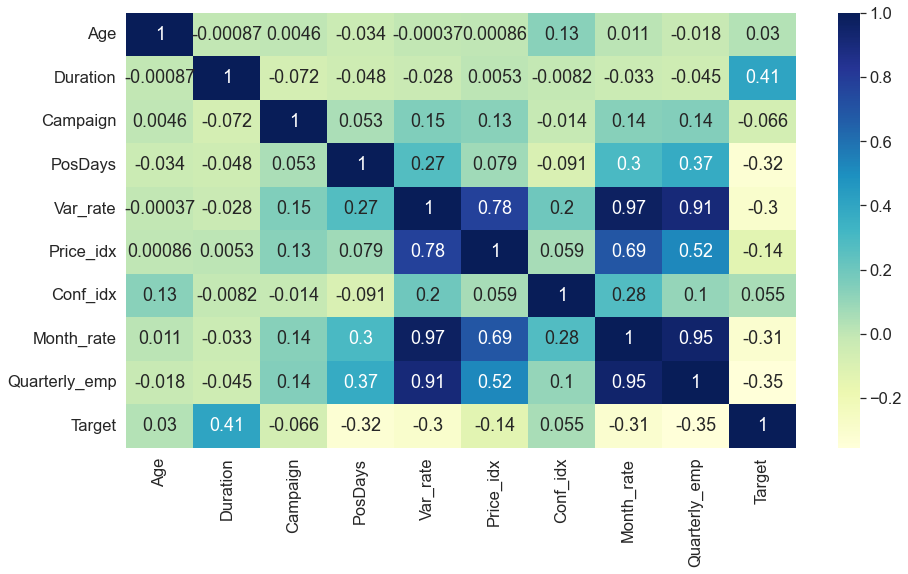

In [15]:
# Visualise the correlation.
import seaborn as sns

# fig and font size
sns.set(rc = {'figure.figsize':(15, 8)})
sns.set(font_scale = 1.5)

# plot heatmap
dataplot = sns.heatmap(_correlations, cmap="YlGnBu", annot=True)

The heatmap indicates what you have seen in the VIF analysis. The values of Duration, Campaign and Target indicates hardly any correlation between these independent variables. Unfortunately, there are a lot of strong correlations and we did not satisfy Assumption 4. What about Assumption 5?

# Box-Tidwell test 

The Box-Tidwell test can be used to explore if the independent variables () are linearly related to the log odds (Assumption 5). This is one of the critical assumptions of logistic regression. The logit refers to the logarithm of the odds. 

 
The Box-Tidwell test is only applicable to continuous variables. The output will display the , indicating the statistical significance of the interaction between features. In short, if , there is a statistically significant presence of non-linearity between features. Let’s explore this.

The code for the Box-Tidwell test is similar to VIF. The code snippet can be written as:

<img width="580" alt="Screenshot 2022-05-19 at 13 35 33" src="https://user-images.githubusercontent.com/98043245/169294499-27117e60-6532-4cc4-8c2e-57f249cbd0e0.png">

In [50]:
# [1] Import necessary libraries, modules, classes and packages.
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

# [2] Select all the continuous variables.
continuous_vars = list(df_num.columns[:-1])

# [3] Make a copy of the DataFrame.
df_test = df.copy()

# [4] Add logit transform interaction terms (natural log) for 
# continuous variables e.g.. Age * Log(Age).
for var in continuous_vars:
    df_test[f'{var}:Log_{var}'] = df_test[var].apply(lambda x: x * np.log(x))
    
    # [5] Keep columns related to continuous variables.
    cols_to_keep = continuous_vars + [_ for _ in df_test.columns if 'Log_' in _]

# [6] View output
list(cols_to_keep) 

['Age',
 'Duration',
 'Campaign',
 'PosDays',
 'Var_rate',
 'Price_idx',
 'Conf_idx',
 'Month_rate',
 'Quarterly_emp',
 'Age:Log_Age',
 'Duration:Log_Duration',
 'Campaign:Log_Campaign',
 'PosDays:Log_PosDays',
 'Var_rate:Log_Var_rate',
 'Price_idx:Log_Price_idx',
 'Conf_idx:Log_Conf_idx',
 'Month_rate:Log_Month_rate',
 'Quarterly_emp:Log_Quarterly_emp']

A list with all the column names is returned. Note that all these columns have continuous variables. Next, you need to redefine the variables, add a constant term and build the logistic regression model to test the linear relationship with the log odds, testing Assumption 5. The code snippet can be written as:

<img width="579" alt="Screenshot 2022-05-19 at 13 36 38" src="https://user-images.githubusercontent.com/98043245/169294691-48aad186-559e-4246-86e2-c754aa7e5410.png">

In [51]:
# Redefining variables to include interaction terms
# [1] replace missing values with 0
X_lt = df_test[cols_to_keep].fillna(0)

# [2] Add constant term
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# [3] Building model and fit the data (using statsmodel's Logit)
logit_results = GLM(y, X_lt_constant, family=families.Binomial()).fit()

# [4] Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Target   No. Observations:                41188
Model:                            GLM   Df Residuals:                    41170
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8371.3
Date:                Thu, 19 May 2022   Deviance:                       16743.
Time:                        14:25:38   Pearson chi2:                 2.71e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age       

The summary indicates that only Campaign and Month_rate have linearity with the log odds. The other variables have -values larger than 0.05, therefore, a non-linear relationship with the log odds. What if you want to see the log odds values? The code snippet will be:

<img width="572" alt="Screenshot 2022-05-19 at 13 37 40" src="https://user-images.githubusercontent.com/98043245/169294891-77b72bc0-9df2-4774-90ff-512d0b61534a.png">

In [52]:
# [1] Use the model you created
logit_results = GLM(y, X_lt, family=families.Binomial()).fit()
predicted = logit_results.predict(X_lt)

# [2] Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# [3] View output
log_odds

0       -4.149033
1       -4.578973
2        1.604549
3       -3.022360
4       -0.859085
           ...   
41183   -3.752689
41184   -4.509934
41185   -6.252305
41186   -0.622407
41187   -5.234703
Length: 41188, dtype: float64

Look at that! You can now scroll through the logodd values. For interest sake, let's plot two variables, one that is not linearly related to the log odds (e.g. Age) and one that is (e.g. Month-rate). You will need to import Matplotlib library and write a function. Start with the def keyword and specify the condition as vis_var(varname):. Specify the scatterplot function, xlabel, ylabel and view the plot.

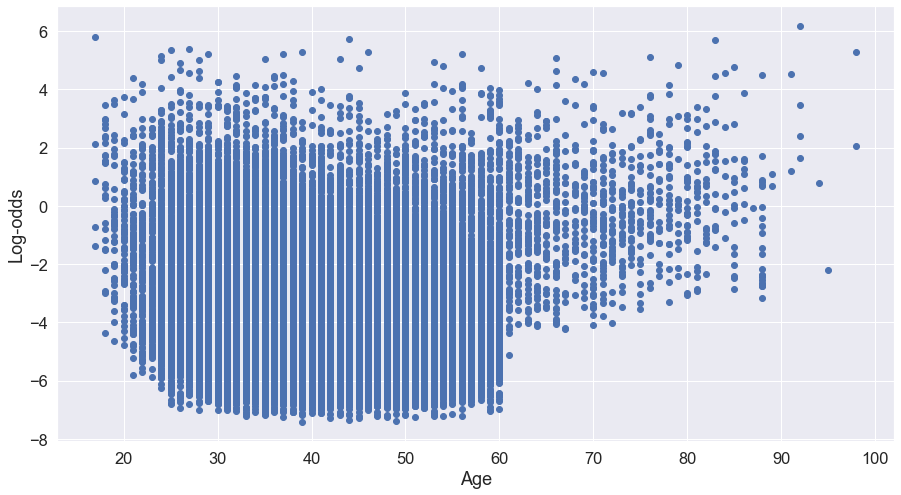

In [28]:
import matplotlib.pyplot as plt

def vis_var(varname):
    # Visualise predictor variable vs logit values for Age.
    plt.scatter(x=X_lt[varname].values, y=log_odds)
    plt.xlabel(varname)
    plt.ylabel("Log-odds")
    plt.show()
    
# Look at one that is not linearly related to the log odds.
vis_var('Age')

The data points are all 'clustered'/grouped together. What about one that is linearly related to the log odds? Specify the vis_var('Month_rate') and execute the code.

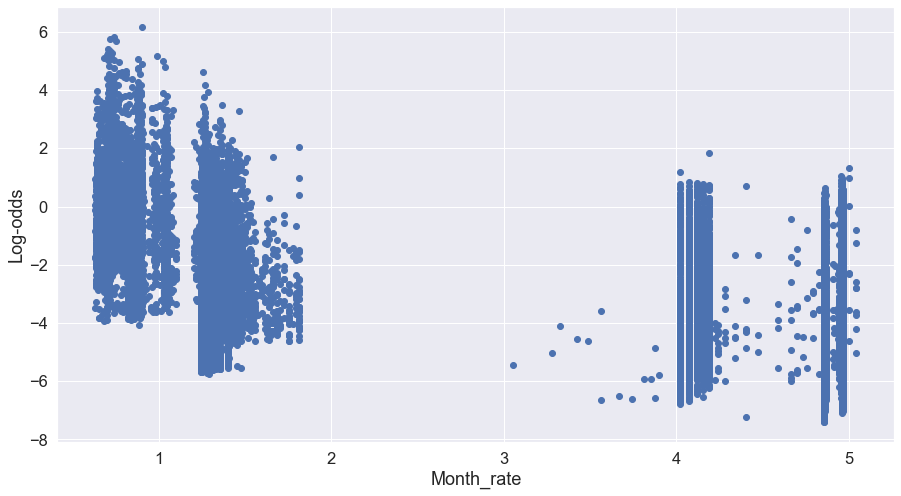

In [29]:
# Look at one that is linearly related to the log odds
vis_var('Month_rate')

Interesting! Can you see the difference between the two plots? Try some more variables and deepen your understanding.

# Recursive feature elimination (RFE)

Recursive feature elimination (RFE) is an algorithm that constructs a model and chooses either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This makes RFE an efficient approach to eliminating features from a training data set. At its core, RFE – which can be used for classification and regression – is a feature selection method for fitting a more precise model. 

Although you could select or remove features manually, the process becomes tedious when many features are involved. Feature selection is an important part of modelling, because of the concept of ‘Garbage in, garbage out’. This means if we use the wrong features as inputs, the model we get as output would also be inconsistent and incorrect. Data analysts can use the RFE process to ensure that the selected features follow the last two assumptions for logistic regression.

In this exercise, we will apply RFE and then select only the necessary columns to use. This step is important because we want to satisfy the assumption that the independent variables (represented in columns) are independent of each other (Assumption 4). Next, we will run the BLR, determine the accuracy of the model, create a confusion matrix and print the classification report.  

<img width="591" alt="Screenshot 2022-05-19 at 13 42 34" src="https://user-images.githubusercontent.com/98043245/169295835-1c03aeb0-78ce-4a71-a700-9c74394c712b.png">

<img width="554" alt="Screenshot 2022-05-19 at 13 43 37" src="https://user-images.githubusercontent.com/98043245/169296007-256844a4-3e0b-4960-9dc0-61cd376ce077.png">

In [16]:
# Recursive feature elimination (RFE):
# [1] Create a new DataFrame.
data_final_vars=df_fin.columns.values.tolist()

# [2a] Set the dependent variable.
y=['Target']  
# [2b] Set the independent variable.
X=[i for i in data_final_vars if i not in y]  

# [3] Import two packages from sklearn:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# [4] Indicate ‘logreg’ equals ‘LogisticRegression()’. 
logreg = LogisticRegression()

# [5] Specify ‘rfe’ value and no. of features.
# Here are two options for rfe. See which one works for you.
rfe = RFE(logreg)

# [6] Indicate the fit with ‘fit()’.
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())  

# [7] Print the two rfes:
print(rfe.support_)
print(rfe.ranking_) 

[False False False False False False False False False False  True  True
  True False False False  True False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
  True  True  True  True  True  True  True False]
[25 28 24 29 23 21 27 20 26  5  1  1  1  4  9  3  1  8  2  7  6  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 14 10 16 12 15 19 13 11 18 17
  1  1  1  1  1  1  1 22]


## Selecting necessary columns for BLR

Now that we have tested all the assumptions (2.1.2 Logistic regression), the next step is to select the independent variables that we think have an effect on the dependent variable. These independent variables are represented in the columns. Previously we added columns to the original DataFrame (df) when we created dummy variables. For BLR, we want to keep matters simple. Therefore, we will select only the necessary columns for the BLR. Once we select the variables, we just run the logit function and summarise the model efficacy by checking the p-values and R-squared value.

<img width="592" alt="Screenshot 2022-05-19 at 13 47 21" src="https://user-images.githubusercontent.com/98043245/169296703-28965f6f-f609-4f16-b411-bab58564d526.png">

In [54]:
# [1] Name the new DataFrame and [2] specify all the columns for BLR:
nec_cols = ['Status_divorced', 'Status_married', 'Status_single',
            'Status_unknown', 'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 'Edu_uni', 'House_no',
            'House_unknown', 'House_yes', 'Loan_no', 'Loan_unknown',
            'Loan_yes', 'DOW_fri', 'DOW_mon']

# [3a] Set the independent variable.
X=os_data_X[nec_cols]  
# [3b] Set the dependent variable.
y=os_data_y['Target']  

# [4] Set the logit() to accept y and x as parameters and return the logit object:
logit_model=sm.Logit(y, X)

# [5] Indicate result = logit_model.fit() function.
result=logit_model.fit()  

# [6] Print the results.
print(result.summary2()) 


Optimization terminated successfully.
         Current function value: 0.518398
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.252     
Dependent Variable: Target           AIC:              53047.5026
Date:               2022-05-19 14:26 BIC:              53188.9779
No. Observations:   51134            Log-Likelihood:   -26508.   
Df Model:           15               LL-Null:          -35443.   
Df Residuals:       51118            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Status_divorced  -0.5287   0.0542  -9.7461 0.0000 -0.6350 -0.4224
Status_married    0.1734   0.0296   5.8634 0.0000  0.1155  0.2314


Well done! You have all the details (coefficients, standard errors, z-value probabilities, etc.) of the BLR model. Generating these results is evidence that you have successfully built a BLR model.

To check if the BLR model is working and accurate, we need to first check if the LogisticRegression() function is active:

<img width="593" alt="Screenshot 2022-05-19 at 14 28 30" src="https://user-images.githubusercontent.com/98043245/169304671-0c260a93-32ab-47d9-8bbe-3c1e863832fe.png">

In [55]:
# [1] Import necessary packages:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# [2] Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# [2a] Set LogisticRegression() to ‘logreg’.
logreg = LogisticRegression() 

# [2b] Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train)  

LogisticRegression()

<img width="597" alt="Screenshot 2022-05-19 at 14 30 09" src="https://user-images.githubusercontent.com/98043245/169305020-2483b3de-a081-4e67-8ac7-8d4f89ca1303.png">

In [56]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


Well done! The accuracy is 91% which is a great fit for this data set and business question. However, if you had a 91% accuracy fit for a business question based on a ‘ yes’ or ‘no’ answer, it might not be a good fit. To further test the model’s accuracy, we can also employ a confusion matrix to evaluate the accuracy of the classification. 

# Using the confusion matrix to determine classification accuracy

A confusion matrix is a tabular summary of prediction results. Think of a confusion matrix as a specific table layout that allows us to capture the performance of a classification algorithm in a simple visual manner. A confusion matrix is not a metric to evaluate a model. Instead, it provides insights into the predictions. It’s important to learn how to create a confusion matrix because it will help you to understand other classification metrics such as precision and recall.

It’s called a ‘confusion matrix’ because this cross-tabulation helps us assess if our chosen procedure is confusing two classes (i.e. frequently mislabelling one as another). Consider the following:

each row of the matrix represents the actual number of observations in a given class
each column represents the predicted number of observations in a given class (or vice versa)
each cell in the table thus reports the number of observations by actual and predicted class.
A confusion matrix goes deeper than classification accuracy by showing the correct and incorrect (i.e. true or false) predictions of each class. In the case of a binary classification task, a confusion matrix is a 2 x 2 matrix. If there are three different classes, it would be a 3 x 3 matrix, and so on. 

<img width="595" alt="Screenshot 2022-05-19 at 14 34 59" src="https://user-images.githubusercontent.com/98043245/169306037-675ee767-997e-42e0-80a0-136719dc3ed3.png">
<img width="601" alt="Screenshot 2022-05-19 at 14 35 13" src="https://user-images.githubusercontent.com/98043245/169306086-bfbbc0bf-627a-4fd9-b13c-6b0f164689b5.png">


In [57]:
# Create the confusion matrix to test classification accuracy in BLR:
# [1] Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# [2] Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# [3] Print the confusion_matrix.
print(confusion_matrix)  

[[7666    0]
 [1312 6363]]


<img width="599" alt="Screenshot 2022-05-19 at 14 36 40" src="https://user-images.githubusercontent.com/98043245/169306434-0235f067-7741-4fb9-9f89-bb7e2034c5a1.png">


In [58]:
# [1] Import the necessary package.
from sklearn.metrics import classification_report  

# [2] Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7666
           1       1.00      0.83      0.91      7675

    accuracy                           0.91     15341
   macro avg       0.93      0.91      0.91     15341
weighted avg       0.93      0.91      0.91     15341



The high precision scores indicate that the model is accurate. This is an important metric in this case, as we’ll need to use the model to select the most appropriate customers for the new project. In other situations, accuracy might be the most important criterion, because it is a broader measure of how many classifications are correct. In some cases, recall might be important, because we might want to know how many instances of selecting a customer were, in fact, correct.

This was a long worked example, so let’s recap what we did to reach these results:

<img width="558" alt="Screenshot 2022-05-19 at 14 38 37" src="https://user-images.githubusercontent.com/98043245/169306848-e7870377-1773-44ea-b136-75769a6e70a3.png">